In [1]:
import numpy as np
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
a=np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
b=np.array([[1,0,-1],])
print(a)
print(b)
print(a@b.T)
print(np.sum(a,axis=0))
print(np.repeat(b,3,axis=0))

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]
[[ 1  0 -1]]
[[-2]
 [-2]
 [-2]
 [-2]]
[10 14 18]
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


In [2]:
# Adaline with gradient descent
@dataclass
class Adaline:
    eta:float = 0.1
    n_iter:int = 50
    seed:int = 1

    def fit(self, X, y):
        # initialize wj and b
        # X must be n samples, m features; y must be n samples, 1 column
        self.w=np.random.RandomState(seed=self.seed).normal(0,0.05,size=X.shape[1]).T  # shape: m x 1
        self.b=np.float_(0)
        # get total sample size n
        n=X.shape[0]

        # initialize errors 
        self.errors=[]

        # run iterations
        for _ in range(self.n_iter):
            # initialize error collector 
            error=0
            # in each iteration calc identity func/net input then convert to y-y_hat
            # then calc dL/db then dL/dwj
            dL_db = - np.sum(y-self.net_input(X),axis=0)/n  # n x 1 then sum by column to a scalar
            dL_dw = - ((y.T-self.net_input(X).T) @ X)/n  # (1 x n - 1 x n) * n x m = 1 x m

            # calc delta_w and delta_b
            delta_b=-self.eta*dL_db  # 1 x 1
            delta_w=-self.eta*dL_dw.T  # m x 1

            # update both wj and b
            self.b+=delta_b
            self.w+=delta_w # m x 1 + m x 1 = m x 1

            # record error of this iteration
            error = np.sum(y-self.net_input(X),axis=0)
            self.errors.append(error)
        
        # next iteration
    
    def net_input(self,X):
        z = X @ self.w + self.b # n x m * m x 1 = n x 1
        return z


      0    1    2    3  4
48  5.3  3.7  1.5  0.2  0
49  5.0  3.3  1.4  0.2  0
50  7.0  3.2  4.7  1.4  1
51  6.4  3.2  4.5  1.5  1
<class 'numpy.ndarray'> (100, 2)


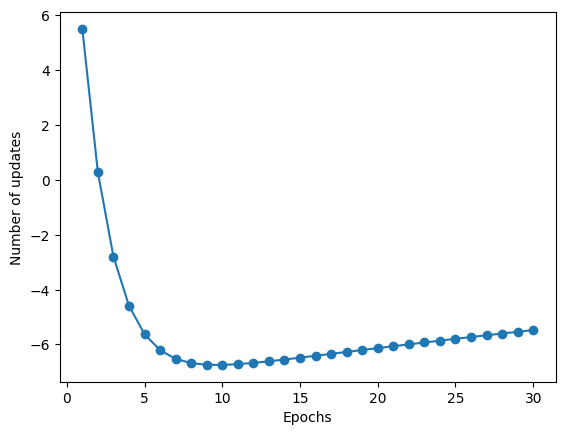

In [3]:
# training perceptron on Iris dataset
url=r'.\iris.data'
df=pd.read_csv(url,header=None,encoding='utf-8')
# keep only the first two Iris flower: setosa and versicolor
df=df.iloc[:100,:]

# convert string class labels to 1-versicolor and 0-setosa
df.iloc[:,-1]=np.where(df.iloc[:,-1]=='Iris-versicolor',1,0)
print(df.iloc[48:52,:])
# extract X and y
X=df.iloc[:,[0,2]].values
y=df.iloc[:,-1].values
print(type(X),X.shape)

# training
adaline=Adaline(eta=0.01,n_iter=30)
adaline.fit(X,y)
plt.plot(range(1,len(adaline.errors)+1), adaline.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [4]:
print(adaline.errors)

[5.493169304525756, 0.2749978820398916, -2.7962344029709207, -4.590406568117962, -5.625093076165289, -6.208247013066098, -6.523096664083255, -6.678659027073719, -6.739795382743232, -6.745094376518446, -6.7175124625268445, -6.670704973686782, -6.61279311175027, -6.548605308183077, -6.481010834781764, -6.411713302344246, -6.341722792412617, -6.271636775505945, -6.201807257204617, -6.132440229742715, -6.063654845341845, -5.99551862396148, -5.928068401517504, -5.861322793675159, -5.795289611408342, -5.729970272861175, -5.665362428012161, -5.601461519959049, -5.538261713496798, -5.475756447238768]
